<a href="https://colab.research.google.com/github/JINU8/Kaggle-ML-problems/blob/master/Purplle_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import files
uploaded = files.upload()

Saving hr_problem_data_test.csv to hr_problem_data_test (1).csv
Saving hr_problem_data_train.csv to hr_problem_data_train (1).csv


# STARTS HERE

In [1]:
import pandas as pd
import numpy as np

In [2]:
 # visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
 
# machine learning
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, precision_score, recall_score,f1_score

In [4]:
#loading all data's for data wrangling
train_df = pd.read_csv('hr_problem_data_train.csv')
test_df = pd.read_csv('hr_problem_data_test.csv')

#ANALYSIS AND VISUALISATION

In [5]:
train_df.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
1,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
2,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0
3,58896,Analytics,region_2,Bachelor's,m,sourcing,2,31,3.0,7,0,0,85,0
4,49017,Sales & Marketing,region_7,Bachelor's,f,sourcing,1,35,5.0,3,1,0,50,1


In [6]:
 train_df.tail()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
44487,39602,Sales & Marketing,region_13,Master's & above,m,sourcing,1,33,3.0,8,1,0,50,0
44488,14502,Technology,region_7,Master's & above,m,other,1,54,4.0,7,0,0,81,1
44489,64063,Sales & Marketing,region_7,Master's & above,m,other,3,35,1.0,10,0,0,51,0
44490,64712,Sales & Marketing,region_2,Bachelor's,m,other,2,33,1.0,3,0,0,48,0
44491,35000,Operations,region_16,Bachelor's,m,other,1,37,4.0,7,1,0,54,0


In [7]:
#All the column names
print(train_df.columns.values)

['employee_id' 'department' 'region' 'education' 'gender'
 'recruitment_channel' 'no_of_trainings' 'age' 'previous_year_rating'
 'length_of_service' 'KPIs_met >80%' 'awards_won?' 'avg_training_score'
 'is_promoted']


##Let's get more insights into the data we are working on

In [8]:
 train_df.info()
print('_'*40)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44492 entries, 0 to 44491
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           44492 non-null  int64  
 1   department            44492 non-null  object 
 2   region                44492 non-null  object 
 3   education             42534 non-null  object 
 4   gender                44492 non-null  object 
 5   recruitment_channel   44492 non-null  object 
 6   no_of_trainings       44492 non-null  int64  
 7   age                   44492 non-null  int64  
 8   previous_year_rating  41125 non-null  float64
 9   length_of_service     44492 non-null  int64  
 10  KPIs_met >80%         44492 non-null  int64  
 11  awards_won?           44492 non-null  int64  
 12  avg_training_score    44492 non-null  int64  
 13  is_promoted           44492 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 4.8+ MB
_____________

In [9]:
 train_df.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
count,44492.000000,44492.000000,44492.000000,41125.000000,44492.000000,44492.000000,44492.000000,44492.000000,44492.000000
mean,39180.934348,1.250000,34.794345,3.334055,5.865751,0.352176,0.023442,63.369797,0.085206
std,22599.924968,0.605472,7.658301,1.261816,4.275574,0.477654,0.151306,13.360335,0.279192
min,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000,0.000000
25%,19643.500000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000,0.000000
50%,39173.500000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000
75%,58744.250000,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000,0.000000
max,78297.000000,10.000000,60.000000,5.000000,34.000000,1.000000,1.000000,99.000000,1.000000


In [10]:
#Including the object values 
train_df.describe(include=['O'])

,department,region,education,gender,recruitment_channel
count,44492,44492,42534,44492,44492
unique,9,34,3,2,3
top,Sales & Marketing,region_2,Bachelor's,m,other
freq,13679,9977,29807,31246,24656


In [11]:
combine = [train_df, test_df]

In [12]:
combine

[       employee_id         department  ... avg_training_score is_promoted
 0             7513  Sales & Marketing  ...                 50           0
 1             2542  Sales & Marketing  ...                 50           0
 2            48945         Technology  ...                 73           0
 3            58896          Analytics  ...                 85           0
 4            49017  Sales & Marketing  ...                 50           1
 ...            ...                ...  ...                ...         ...
 44487        39602  Sales & Marketing  ...                 50           0
 44488        14502         Technology  ...                 81           1
 44489        64063  Sales & Marketing  ...                 51           0
 44490        64712  Sales & Marketing  ...                 48           0
 44491        35000         Operations  ...                 54           0
 
 [44492 rows x 14 columns],
        employee_id         department     region  ... is_promoted ran

###Now from the above reprsentation we can we see that data is not a stratified represenation of all the fields, some fields are more frequent in occurences. So lets check how data is distributed overall.

In [13]:
train_df["length_of_service"].unique()

array([ 7, 10,  2,  3,  4,  5, 12,  6, 13,  1,  8,  9, 11, 23, 19, 18, 25,
       16, 15, 14, 20, 17, 31, 34, 21, 26, 22, 24, 27, 29, 28, 33, 32, 30])

In [14]:
train_df['gender'].value_counts()

m    31246
f    13246
Name: gender, dtype: int64

In [15]:
train_df['department'].value_counts()

Sales & Marketing    13679
Operations            9223
Technology            5792
Procurement           5736
Analytics             4346
Finance               2080
HR                    1970
Legal                  858
R&D                    808
Name: department, dtype: int64

In [16]:
train_df['education'].value_counts()

Bachelor's          29807
Master's & above    12086
Below Secondary       641
Name: education, dtype: int64

In [17]:
train_df['region'].value_counts(ascending=False)

region_2     9977
region_22    5210
region_7     3976
region_15    2283
region_13    2148
region_26    1850
region_31    1567
region_4     1366
region_27    1332
region_16    1210
region_28    1075
region_11    1059
region_23     968
region_29     800
region_32     760
region_19     693
region_20     687
region_17     659
region_25     656
region_14     653
region_5      638
region_6      578
region_8      527
region_30     522
region_10     521
region_1      505
region_12     419
region_24     407
region_21     336
region_9      334
region_3      289
region_34     241
region_33     220
region_18      26
Name: region, dtype: int64

In [18]:
# grp = sns.histplot(train_df['region'])
# grp.set_xticklabels(train_df['region'],rotation=90)

In [19]:
train_df['recruitment_channel'].value_counts()

other       24656
sourcing    18901
referred      935
Name: recruitment_channel, dtype: int64

In [20]:
train_df[['department', 'is_promoted']].groupby(['department'], as_index=False).mean().sort_values(by='is_promoted', ascending=False)

,department,is_promoted
8,Technology,0.109461
5,Procurement,0.096234
0,Analytics,0.095950
4,Operations,0.089992
1,Finance,0.082212
7,Sales & Marketing,0.071570
6,R&D,0.069307
2,HR,0.056345
3,Legal,0.047786


In [21]:
train_df[['region', 'is_promoted']].groupby(['region'], as_index=False).mean().sort_values(by='is_promoted', ascending=False)

,region,is_promoted
8,region_17,0.142640
28,region_4,0.141288
17,region_25,0.125000
20,region_28,0.121860
15,region_23,0.118802
22,region_3,0.114187
14,region_22,0.114012
31,region_7,0.108652
23,region_30,0.099617
0,region_1,0.093069


In [22]:
train_df[['education', 'is_promoted']].groupby(['education'], as_index=False).mean().sort_values(by='is_promoted', ascending=False)

,education,is_promoted
2,Master's & above,0.100116
0,Bachelor's,0.081424
1,Below Secondary,0.081123


In [23]:
train_df[['gender', 'is_promoted']].groupby(['gender'], as_index=False).mean().sort_values(by='is_promoted', ascending=False)

,gender,is_promoted
0,f,0.087649
1,m,0.084171


In [24]:
train_df[['recruitment_channel', 'is_promoted']].groupby(['recruitment_channel'], as_index=False).mean().sort_values(by='is_promoted', ascending=False)

,recruitment_channel,is_promoted
1,referred,0.121925
2,sourcing,0.085392
0,other,0.083671


In [25]:
train_df[['no_of_trainings', 'is_promoted']].groupby(['no_of_trainings'], as_index=False).mean().sort_values(by='is_promoted', ascending=False)

,no_of_trainings,is_promoted
0,1,0.087940
1,2,0.076959
2,3,0.069348
3,4,0.053476
5,6,0.027778
4,5,0.010000
6,7,0.000000
7,8,0.000000
8,9,0.000000
9,10,0.000000


In [26]:
train_df[['awards_won?', 'is_promoted']].groupby(['awards_won?'], as_index=False).mean().sort_values(by='is_promoted', ascending=False)

,awards_won?,is_promoted
1,1,0.447747
0,0,0.076503


In [27]:
train_df[['length_of_service', 'is_promoted']].groupby(['length_of_service'], as_index=False).mean().sort_values(by='is_promoted', ascending=False)

,length_of_service,is_promoted
33,34,0.250000
22,23,0.125000
31,32,0.125000
28,29,0.111111
10,11,0.109661
18,19,0.097276
7,8,0.096087
9,10,0.094413
21,22,0.090909
1,2,0.088868


In [28]:
train_df[['previous_year_rating', 'is_promoted']].groupby(['previous_year_rating'], as_index=False).mean().sort_values(by='is_promoted', ascending=False)

,previous_year_rating,is_promoted
4,5.0,0.162851
3,4.0,0.080334
2,3.0,0.072513
1,2.0,0.043212
0,1.0,0.014476


In [29]:
train_df[['KPIs_met >80%', 'is_promoted']].groupby(['KPIs_met >80%'], as_index=False).mean().sort_values(by='is_promoted', ascending=False)

,KPIs_met >80%,is_promoted
1,1,0.168932
0,0,0.039691


#Lets check data distribution of few params

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2c6ad72b10>,
      dtype=object)

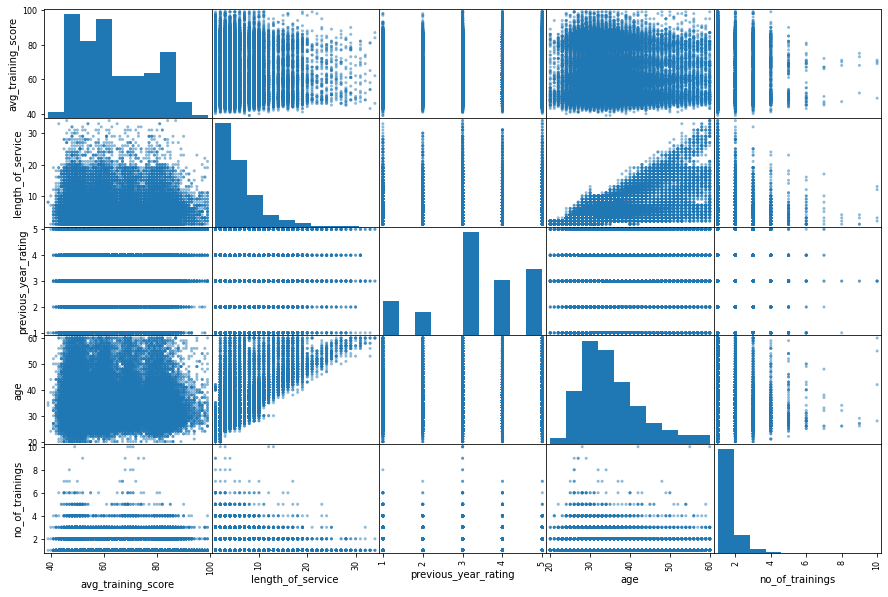

In [30]:
from pandas.plotting import scatter_matrix
attributes = ["avg_training_score", "length_of_service", "previous_year_rating", "age","no_of_trainings"	]
scatter_matrix(train_df[attributes], figsize=(15, 10))

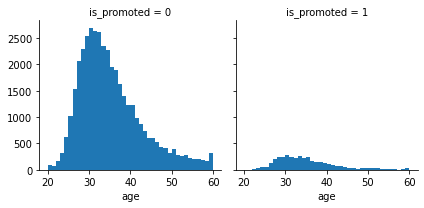

In [31]:
g = sns.FacetGrid(train_df, col='is_promoted', height=3, aspect=1)
g.map(plt.hist, 'age', bins=40)

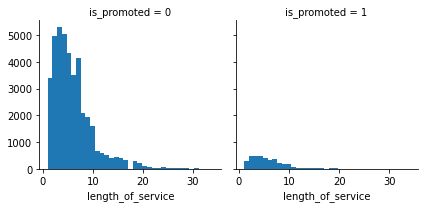

In [32]:
g = sns.FacetGrid(train_df, col='is_promoted', height=3, aspect=1)
g.map(plt.hist, 'length_of_service', bins=35)

Most ppl in age range 30-40 were promoted and many people in first ten years of service were promoted suggesting that, organisation does promote at initial phase of their sevice. Very few ppl were promoted at very later stage or suggesting they were promoted before and the organisation has a pyramidal structure.

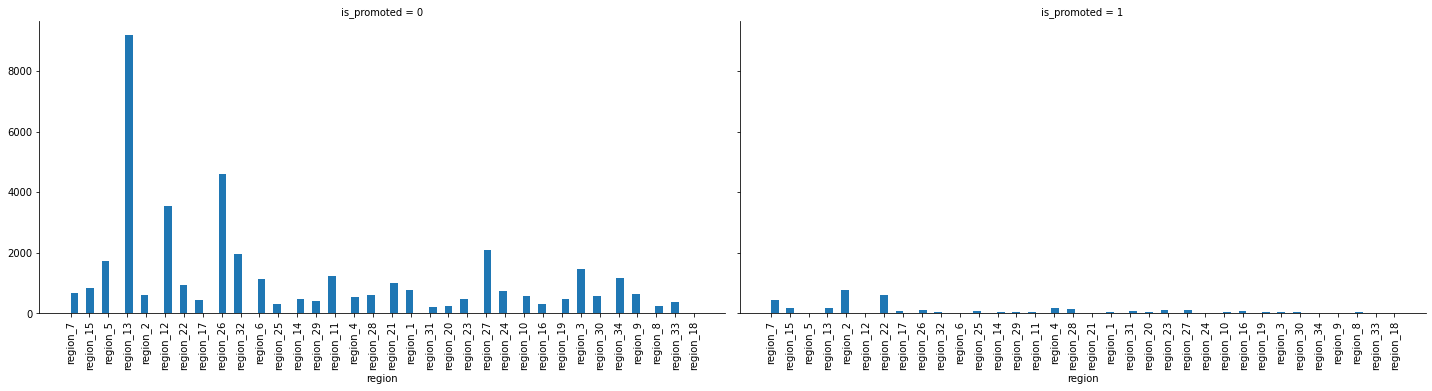

In [33]:


g = sns.FacetGrid(train_df, col='is_promoted', height=5, aspect=2)
g.map(plt.hist, 'region', bins=80)
loc, labels = plt.xticks()
g.set_xticklabels(labels, rotation=90)


/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


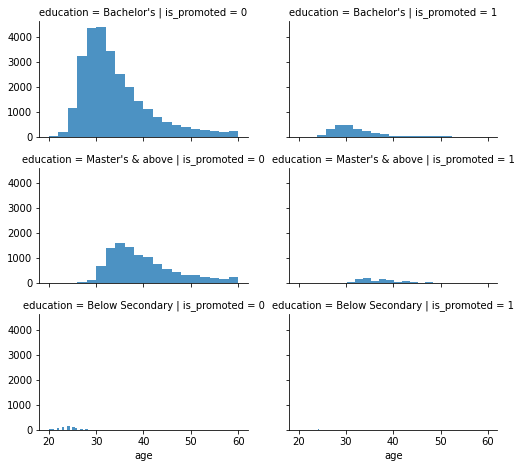

In [34]:
grid = sns.FacetGrid(train_df, col='is_promoted', row='education', size=2.2, aspect=1.6)
grid.map(plt.hist, 'age', alpha=.8, bins=20)
grid.add_legend();

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


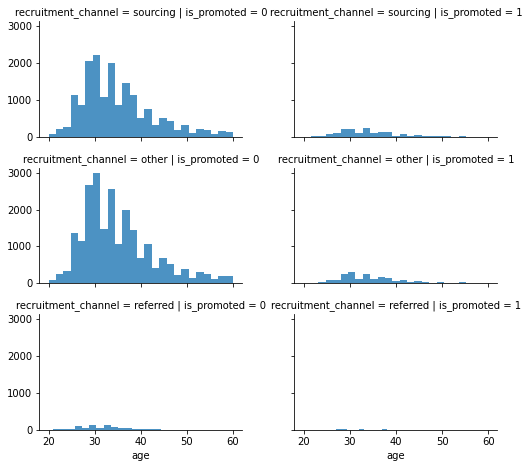

In [35]:
grid = sns.FacetGrid(train_df, col='is_promoted', row='recruitment_channel', size=2.2, aspect=1.6)
grid.map(plt.hist, 'age', alpha=.8, bins=25)
grid.add_legend();

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


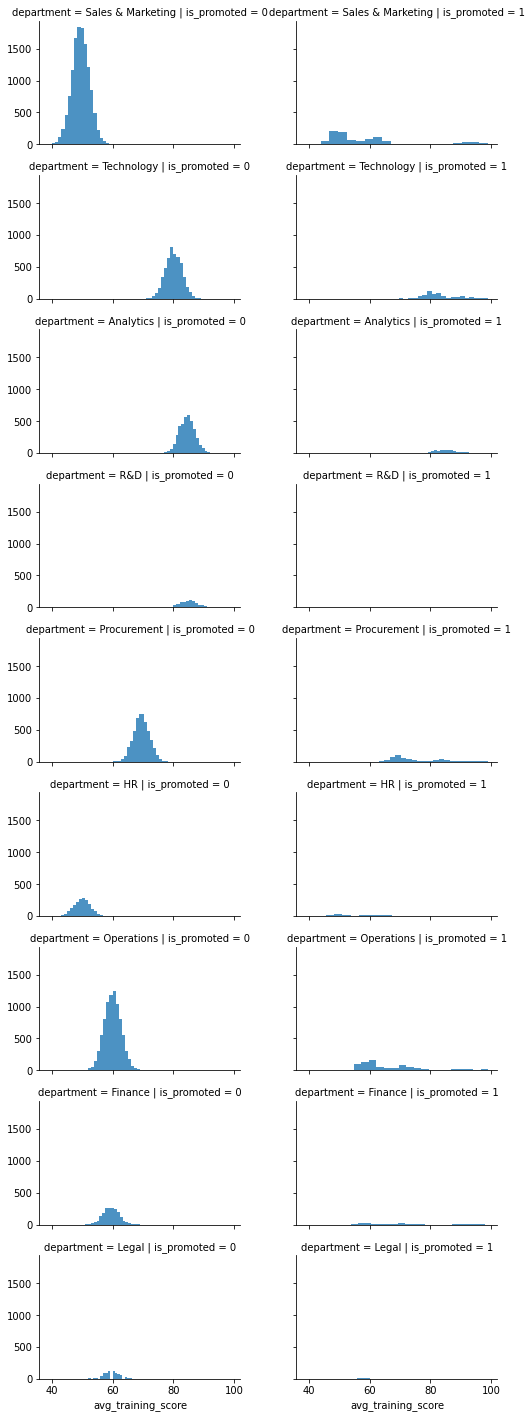

In [36]:
grid = sns.FacetGrid(train_df, col='is_promoted', row='department', size=2.2, aspect=1.6)
grid.map(plt.hist, 'avg_training_score', alpha=.8, bins=20)
grid.add_legend();

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:643: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:648: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


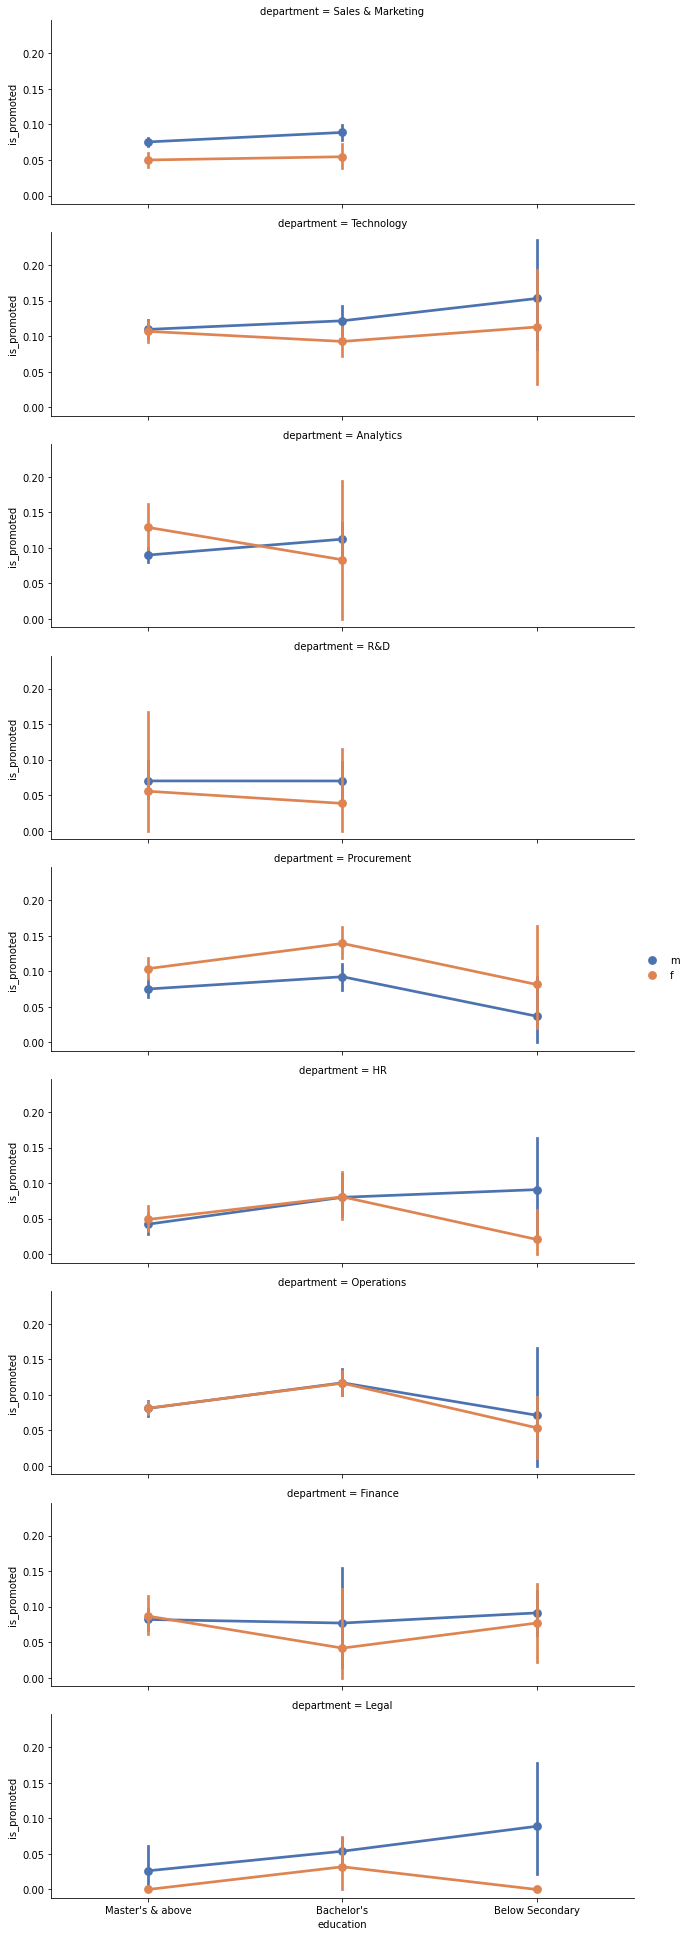

In [37]:

grid = sns.FacetGrid(train_df, row='department', height=3, aspect=3)
grid.map(sns.pointplot, 'education', 'is_promoted', 'gender', palette='deep')
grid.add_legend()

###Though at first glance it does look like there was no gender bias while promoting employees but for below secondary level education men are more likely to be promoted

#Now Lets visualise the correlation between the promoted_employees and other numeric parameter

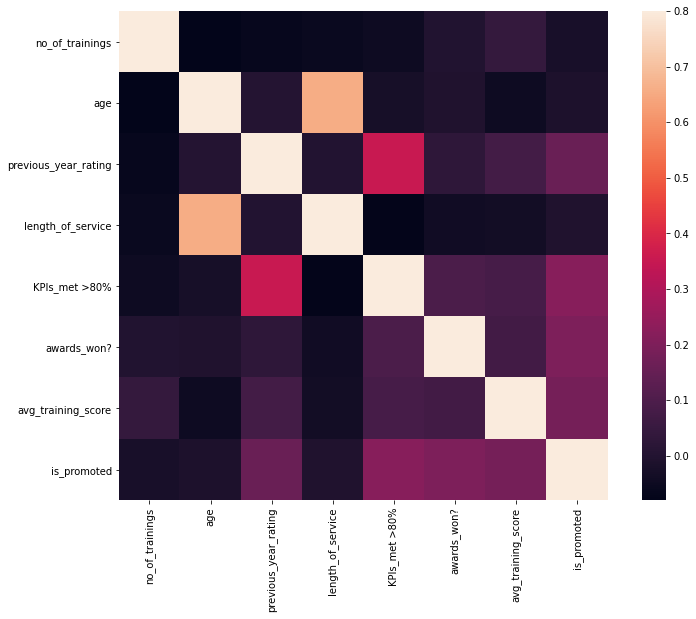

In [38]:
 #correlation matrix
corrmat = train_df.iloc[:,1:].corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


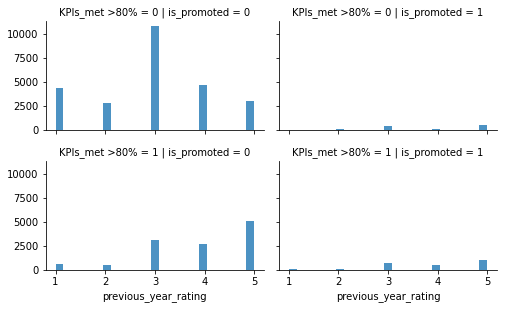

In [39]:
grid = sns.FacetGrid(train_df, col='is_promoted', row='KPIs_met >80%', size=2.2, aspect=1.6)
grid.map(plt.hist, 'previous_year_rating', alpha=.8, bins=25)
grid.add_legend();

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:643: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:648: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


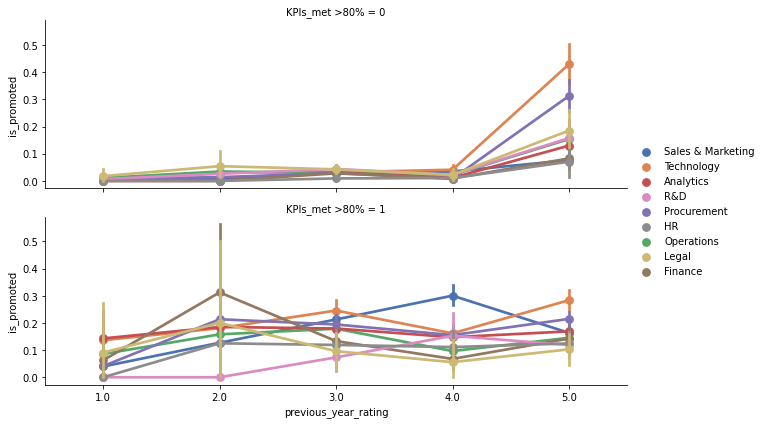

In [40]:
grid = sns.FacetGrid(train_df, row='KPIs_met >80%', height=3, aspect=3)
grid.map(sns.pointplot, 'previous_year_rating', 'is_promoted', 'department', palette='deep')
grid.add_legend()

KPI_met>80% and previous year rating has good correlation. We can clearly see that having above KPI above 80% increases the chance of getting promoted, even when you have lesser previous year ratings.

#FEATURE ENGINEERING

In [41]:
 corr_matrix = train_df.corr()
 corr_matrix["is_promoted"].sort_values(ascending=False)

is_promoted             1.000000
KPIs_met >80%           0.221113
awards_won?             0.201192
avg_training_score      0.183737
previous_year_rating    0.158785
employee_id            -0.000809
length_of_service      -0.007420
age                    -0.014521
no_of_trainings        -0.024831
Name: is_promoted, dtype: float64

In [42]:
exp_df = train_df.copy()

In [43]:
# exp_df["age_cat"] = pd.cut(exp_df["age"],
# bins=[20 ,30 , 40, 50 , 60, np.inf],
# labels=[1, 2, 3, 4, 5])

In [44]:
# exp_df["age_cat"].hist()

In [45]:
for dataset in combine:
    dataset.loc[ dataset['age'] <= 30, 'age'] = 1
    dataset.loc[(dataset['age'] > 30) & (dataset['age'] <= 40), 'age'] = 2
    dataset.loc[(dataset['age'] > 40) & (dataset['age'] <= 50), 'age']   = 3
    dataset.loc[ dataset['age'] > 50, 'age'] = 4
    dataset['age'] = dataset['age'].astype(float)

In [46]:
for dataset in combine:
    dataset.loc[ dataset['length_of_service'] <= 5, 'length_of_service'] = 1
    dataset.loc[(dataset['length_of_service'] > 5) & (dataset['length_of_service'] <= 10), 'length_of_service'] = 2
    dataset.loc[(dataset['length_of_service'] > 10) & (dataset['length_of_service'] <= 15), 'length_of_service']   = 3
    dataset.loc[(dataset['length_of_service'] > 15) & (dataset['length_of_service'] <= 20), 'length_of_service']   = 4
    dataset.loc[(dataset['length_of_service'] > 20) & (dataset['length_of_service'] <= 25), 'length_of_service']   = 5
    dataset.loc[(dataset['length_of_service'] > 25) & (dataset['length_of_service'] <= 30), 'length_of_service']   = 6
    dataset.loc[(dataset['length_of_service'] > 30) & (dataset['length_of_service'] <= 33), 'length_of_service']   = 7
    dataset.loc[ dataset['length_of_service'] > 33, 'length_of_service'] = 8
    dataset['length_of_service'] = dataset['length_of_service'].astype(float)

#DATA  CLEANING
Now some data are missing for education and previous years rating we need to 
fillin those values.

In [47]:
#Bachelor's has most frequency of occurence in education in thi data
obj =" Bachelor's"
train_df["education"].fillna(obj, inplace=True)
exp_df["education"].fillna(obj, inplace=True)
test_df["education"].fillna(obj,inplace =True)

In [48]:
median =train_df["previous_year_rating"].median()
train_df["previous_year_rating"].fillna(median, inplace=True)
exp_df["previous_year_rating"].fillna(median, inplace=True)
test_df["previous_year_rating"].fillna(median,inplace =True)

In [49]:
cat_encoder1 = OrdinalEncoder()
cat_encoder2 = OrdinalEncoder()
cat_encoder3 = OrdinalEncoder()
cat_encoder4 = OrdinalEncoder()
cat_encoder5 = OrdinalEncoder()

department = train_df[["department"]]
region	 = train_df[["region"]]
education = train_df[["education"]]
gender	 = train_df[["gender"]]
recruitment_channel	 = train_df[["recruitment_channel"]]

In [50]:
department_cat_1hot = cat_encoder1.fit_transform(department)
region_cat_1hot = cat_encoder2.fit_transform(region)
education_cat_1hot = cat_encoder3.fit_transform(education)
gender_cat_1hot = cat_encoder4.fit_transform(gender)
recruitment_channel_cat_1hot = cat_encoder5.fit_transform(recruitment_channel)

In [52]:
X_train =train_df.drop(["employee_id","department","region","education","gender", "recruitment_channel", "is_promoted"], axis=1)
X_test =test_df.drop(["employee_id","department","region","education","gender", "recruitment_channel", "is_promoted","random","group"], axis=1)

In [53]:
X_train["dept_cat"] = pd.DataFrame(department_cat_1hot)
X_train["reg_cat"] = pd.DataFrame(region_cat_1hot)
X_train["edu_cat"] = pd.DataFrame(education_cat_1hot)
X_train["gender_cat"] = pd.DataFrame(gender_cat_1hot)
X_train["req_chan_cat"] = pd.DataFrame(recruitment_channel_cat_1hot)

In [54]:
department_cat_test = cat_encoder1.transform(train_df[["department"]])
region_cat_test = cat_encoder2.transform(train_df[["region"]])
education_cat_test = cat_encoder3.transform(train_df[["education"]])
gender_cat_test = cat_encoder4.transform(train_df[["gender"]])
recruitment_channel_cat_test = cat_encoder5.transform(train_df[["recruitment_channel"]])

In [55]:
X_test["dept_cat"] = pd.DataFrame(department_cat_test)
X_test["reg_cat"] = pd.DataFrame(region_cat_test)
X_test["edu_cat"] = pd.DataFrame(education_cat_test)
X_test["gender_cat"] = pd.DataFrame(gender_cat_test)
X_test["req_chan_cat"] = pd.DataFrame(recruitment_channel_cat_test)

In [56]:
Y_train = train_df["is_promoted"]
Y_test = test_df["is_promoted"]


In [57]:
X_test

,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,dept_cat,reg_cat,edu_cat,gender_cat,req_chan_cat
0,1,2.0,3.0,1.0,0,0,59,7.0,10.0,1.0,1.0,2.0
1,2,2.0,3.0,4.0,0,0,80,7.0,15.0,1.0,1.0,0.0
2,1,2.0,1.0,1.0,0,0,51,8.0,18.0,1.0,1.0,0.0
3,1,2.0,3.0,2.0,0,0,80,0.0,11.0,1.0,1.0,2.0
4,1,1.0,3.0,1.0,0,0,49,7.0,31.0,1.0,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...
10311,1,2.0,5.0,2.0,0,0,48,7.0,5.0,1.0,1.0,0.0
10312,2,1.0,3.0,1.0,0,0,48,5.0,8.0,1.0,0.0,0.0
10313,1,1.0,5.0,1.0,1,1,47,5.0,24.0,1.0,0.0,0.0
10314,1,3.0,5.0,2.0,1,1,67,4.0,13.0,1.0,1.0,0.0


In [58]:
X_test

,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,dept_cat,reg_cat,edu_cat,gender_cat,req_chan_cat
0,1,2.0,3.0,1.0,0,0,59,7.0,10.0,1.0,1.0,2.0
1,2,2.0,3.0,4.0,0,0,80,7.0,15.0,1.0,1.0,0.0
2,1,2.0,1.0,1.0,0,0,51,8.0,18.0,1.0,1.0,0.0
3,1,2.0,3.0,2.0,0,0,80,0.0,11.0,1.0,1.0,2.0
4,1,1.0,3.0,1.0,0,0,49,7.0,31.0,1.0,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...
10311,1,2.0,5.0,2.0,0,0,48,7.0,5.0,1.0,1.0,0.0
10312,2,1.0,3.0,1.0,0,0,48,5.0,8.0,1.0,0.0,0.0
10313,1,1.0,5.0,1.0,1,1,47,5.0,24.0,1.0,0.0,0.0
10314,1,3.0,5.0,2.0,1,1,67,4.0,13.0,1.0,1.0,0.0


#MODEL BUILDING AND EVALUATION

In [101]:
# Random Forest

random_forest = RandomForestClassifier(criterion='gini',n_estimators=500)
random_forest.fit(X_train, Y_train)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [102]:
Y_pred1 = random_forest.predict(X_test)
confusion_matrix(Y_test, Y_pred1)


array([[8355, 1084],
       [ 588,  289]])

In [103]:
rand_forest_f1_score = f1_score(Y_test, Y_pred1)
rand_forest_f1_score

0.2568888888888889

In [104]:
print('Model : Random Forest')
print("precision is {0} \nRecall is {1}".format(precision_score(Y_test, Y_pred1),recall_score(Y_test, Y_pred1)))
print("F1 score is :",rand_forest_f1_score)

Model : Random Forest
precision is 0.21048798252002912 
Recall is 0.3295324971493729
F1 score is : 0.2568888888888889


In [105]:
# Decision Tree

decision_tree = DecisionTreeClassifier(criterion='entropy')
decision_tree.fit(X_train, Y_train)
Y_pred2 = decision_tree.predict(X_test)


In [106]:
confusion_matrix(Y_test, Y_pred2)

array([[6333, 3106],
       [ 419,  458]])

In [107]:
decision_tree_f1_score = f1_score(Y_test, Y_pred2)

In [108]:
print('Model : Decision Tree')
print("precision is {0} \nRecall is {1}".format(precision_score( Y_test,Y_pred2),recall_score( Y_test,Y_pred2)))
print("F1 score is :",decision_tree_f1_score)


Model : Decision Tree
precision is 0.12850729517396184 
Recall is 0.5222348916761688
F1 score is : 0.20625985138482322


In [109]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
Y_pred3 = knn.predict(X_test)
confusion_matrix(Y_test, Y_pred3)


array([[7916, 1523],
       [ 618,  259]])

In [110]:
KNN_f1_score = f1_score(Y_test, Y_pred3)

In [111]:
print('Model : KNN')
print("precision is {0} \nRecall is {1}".format(precision_score(Y_test, Y_pred3),recall_score(Y_test, Y_pred3)))
print("F1 score is :",KNN_f1_score)

Model : KNN
precision is 0.14534231200897868 
Recall is 0.2953249714937286
F1 score is : 0.19481007897705904


#FINAL RESULTS

In [112]:
models = pd.DataFrame({
    'Model': ['Random Forest', 
              'Decision Tree','KNN' ],
    'Score': [rand_forest_f1_score, decision_tree_f1_score, KNN_f1_score]})
models.sort_values(by='Score', ascending=False)

,Model,Score
0,Random Forest,0.256889
1,Decision Tree,0.206260
2,KNN,0.194810


*Hyperparamter tuning was done manually because of multiple models and model was iteratively checked for various different input features

#ENDS HERE